In [31]:
import os
import numpy as np
import pandas as pd

import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split


from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

In [3]:
#From lecture plotting data points
def plot_data(x, y):
    plot_x_min, plot_x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    plot_y_min, plot_y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    # plot the basic data points
    class0_x = x[y==0]
    class1_x = x[y==1]
    plt.scatter(class0_x[:,0], class0_x[:,1], c='r', marker='x', label='Class 0')
    plt.scatter(class1_x[:,0], class1_x[:,1], c='b', marker='o', label='Class 1')
    
    plt.xlim(plot_x_min, plot_x_max)
    plt.ylim(plot_y_min, plot_y_max)
    plt.legend()
    plt.title("Basic data")

In [11]:
X_train = pd.read_csv('x_train.csv')
X_test = pd.read_csv('x_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [10]:
X_train

,pixel000,pixel001,pixel002,pixel003,pixel004,pixel005,pixel006,pixel007,pixel008,pixel009,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0.0,1.0,0.0,1.0,0.0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11795,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0
11796,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1
11797,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
11798,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0


In [12]:
y_train

,is_9
0,1
1,0
2,1
3,1
4,0
...,...
11795,0
11796,1
11797,1
11798,0


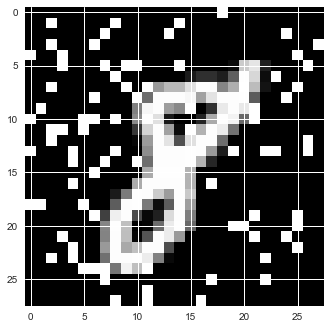

In [24]:
plt.imshow(np.array(X_train.iloc[1, :]).reshape(28,28), cmap='gray')

In [56]:
iterr = []
acc = []
logloss = []
coef_pix000 = []

In [57]:
for i in range(1, 41):
    iterr.append(i)
    log = LogisticRegression(max_iter = i)
    log.fit(X_train, y_train)
    acc.append(log.score(X_train, y_train))
    y_pred = log.predict(X_train)
    logloss.append(log_loss(y_train, y_pred))
    coef_pix000.append(log.coef_[0][0])

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



In [59]:
df = pd.DataFrame(
    {
        'Iteration': iterr,
        'Accuracy': acc,
        'LogLoss': logloss,
        'Coef_Pix000': coef_pix000
    }
)

In [60]:
df

,Iteration,Accuracy,LogLoss,Coef_Pix000
0,1,0.786017,7.390714,-0.000804
1,2,0.933305,2.303594,0.003549
2,3,0.935932,2.212851,0.003362
3,4,0.939492,2.089909,0.003116
4,5,0.943729,1.943555,0.003091
5,6,0.953220,1.615726,0.002831
6,7,0.965085,1.205942,-0.003135
7,8,0.970763,1.009832,-0.012893
8,9,0.971864,0.971781,-0.021696
9,10,0.976441,0.813720,-0.046496


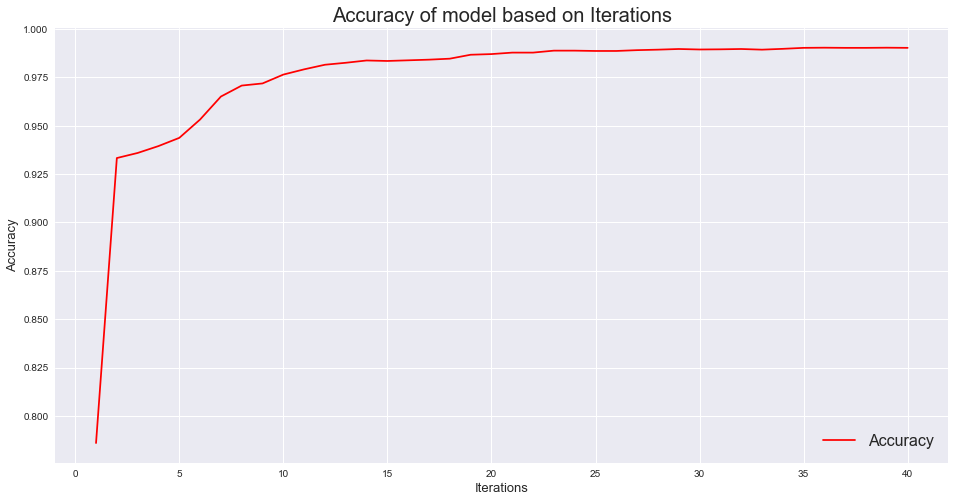

In [61]:
plt.figure(figsize = (16,8))
plt.plot(df.Iteration,df.Accuracy, label='Accuracy',color='red')
# plt.plot(df.Iteration, df.LogLoss, label='LogLoss',color='green')
# plt.ylim([0.0, 1.0])
plt.xlabel('Iterations', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('Accuracy of model based on Iterations', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

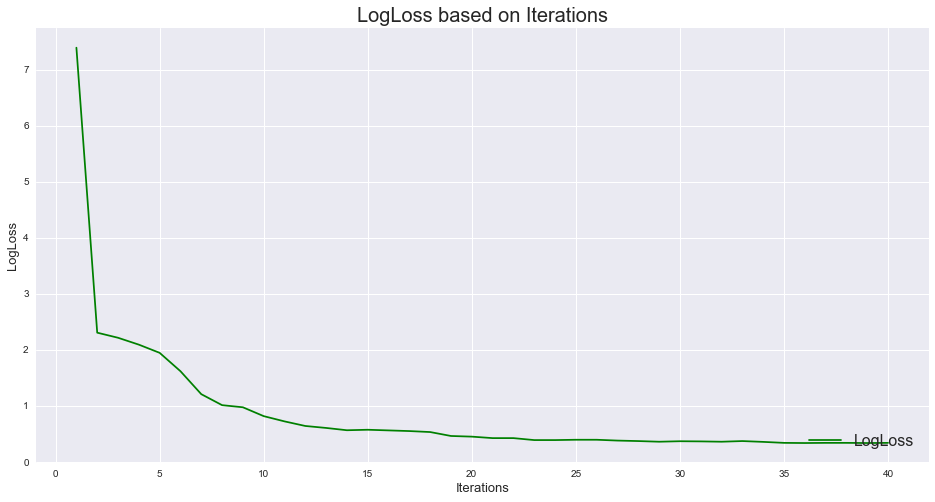

In [62]:
plt.figure(figsize = (16,8))
# plt.plot(df.Iteration,df.Accuracy, label='Accuracy',color='red')
plt.plot(df.Iteration, df.LogLoss, label='LogLoss',color='green')

plt.xlabel('Iterations', fontsize=13)
plt.ylabel('LogLoss', fontsize=13)
plt.title('LogLoss based on Iterations', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [64]:
df.columns

Index(['Iteration', 'Accuracy', 'LogLoss', 'Coef_Pix000'], dtype='object')

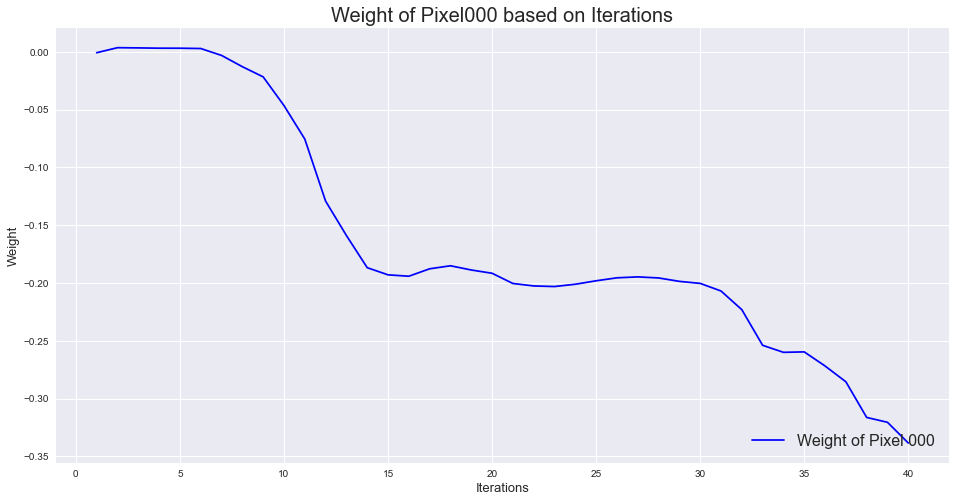

In [65]:
plt.figure(figsize = (16,8))
# plt.plot(df.Iteration,df.Accuracy, label='Accuracy',color='red')
plt.plot(df.Iteration, df.Coef_Pix000, label='Weight of Pixel 000',color='blue')

plt.xlabel('Iterations', fontsize=13)
plt.ylabel('Weight', fontsize=13)
plt.title('Weight of Pixel000 based on Iterations', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [73]:
C_grid = np.logspace(-9, 6, 31)
logloss_c = []
train_acc = []
test_acc = []

for c in C_grid:
    log_reg = LogisticRegression(C=c)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    train_acc.append(log_reg.score(X_train, y_train))
    test_acc.append(log_reg.score(X_test, y_test))
    logloss_c.append(log_loss(y_test, y_pred))

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



In [74]:
df_c = pd.DataFrame(
    {
        'C': C_grid,
        'LogLoss': logloss_c,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    }
)

In [76]:
df_c.sort_values(by='LogLoss')

,C,LogLoss,Training Accuracy,Testing Accuracy
16,1.000000e-01,1.149564,0.985339,0.966717
15,3.162278e-02,1.166981,0.981864,0.966213
17,3.162278e-01,1.219235,0.988898,0.964700
13,3.162278e-03,1.236653,0.972966,0.964196
14,1.000000e-02,1.236653,0.978136,0.964196
12,1.000000e-03,1.323741,0.965932,0.961674
11,3.162278e-04,1.393414,0.958390,0.959657
18,1.000000e+00,1.445665,0.991356,0.958144
19,3.162278e+00,1.532754,0.993814,0.955623
10,1.000000e-04,1.654679,0.951017,0.952093


In [79]:
lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

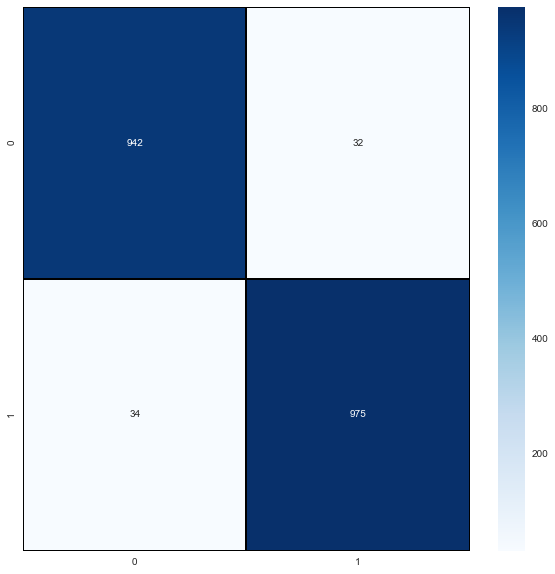

In [81]:
labels = ['0', '1']
cm= confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(cm, index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

[[942  32]
 [ 34 975]]


Text(0.5, 1.0, 'Confusion matrix')

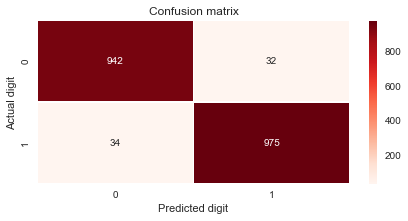

In [91]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# The basic CM isn't very pretty, but we can jazz it up with some plotting.
plt.figure(figsize=(7, 3))
sns.heatmap(conf_matrix, annot=True, linewidths=0.5, cmap='Reds', fmt='g')
plt.ylabel('Actual digit')
plt.xlabel('Predicted digit')
plt.title('Confusion matrix')

In [95]:
np.array(y_test)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [171]:
y_pred[0]

1

In [175]:
false_pos = []
i=0
for x in range(len(y_pred)):
    print(y_pred[i], np.array(y_test.is_9)[i])
    if y_pred[i]==1 and (np.array(y_test.is_9)[i]==0):
        false_pos.append(i)
    i+=1

1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 0
1 1
0 1
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
0 1
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
1 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
0 0
0 0
1 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
0 0
1 0
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
1 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
0 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0


In [180]:
false_neg = []
i=0
for x in range(len(y_pred)):
    print(y_pred[i], np.array(y_test.is_9)[i])
    if y_pred[i]==0 and (np.array(y_test.is_9)[i]==1):
        false_neg.append(i)
    i+=1

1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 0
1 1
0 1
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
0 1
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
1 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
0 0
0 0
1 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
0 0
1 0
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
1 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
0 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0


In [181]:
false_neg

[39,
 56,
 79,
 206,
 229,
 294,
 335,
 376,
 407,
 420,
 444,
 465,
 466,
 497,
 502,
 583,
 620,
 666,
 706,
 757,
 769,
 905,
 958,
 1221,
 1223,
 1225,
 1234,
 1236,
 1238,
 1239,
 1305,
 1358,
 1490,
 1936]

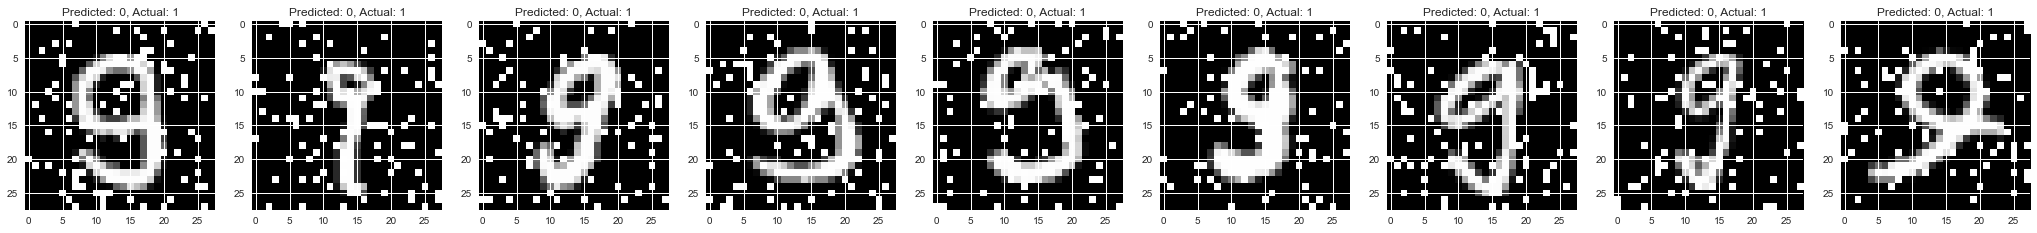

In [185]:
wrong = np.nonzero(y_pred != np.array(y_test.is_9))[0]

plt.figure(figsize=(40, 15))

for plotIdx, wrongIdx in enumerate(false_neg[0:9]):
    plt.subplot(1, 10, plotIdx + 1)
    plt.imshow(np.reshape(x_test[wrongIdx], (28,28)), cmap=plt.cm.gray, vmin=0, vmax=1)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[wrongIdx], np.array(y_test.is_9)[wrongIdx]))

In [ ]:
plt.figure(figsize=(25, 5))

for plotIdx, wrongIdx in enumerate(false_pos[0:9]):
    plt.subplot(1, 10, plotIdx + 1)
    plt.imshow(np.reshape(x_test[wrongIdx], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[wrongIdx], np.array(y_test.is_9)[wrongIdx]))

In [132]:
wrong = np.nonzero(y_pred != np.array(y_test.is_9))[0]


In [149]:
wrong

array([  37,   39,   56,   69,   79,  101,  156,  174,  206,  219,  229,
        290,  294,  335,  344,  352,  355,  376,  401,  407,  420,  440,
        444,  464,  465,  466,  497,  502,  580,  583,  617,  620,  666,
        706,  712,  757,  769,  787,  809,  879,  896,  905,  926,  958,
        984,  998, 1004, 1068, 1221, 1223, 1225, 1234, 1236, 1238, 1239,
       1305, 1313, 1322, 1327, 1358, 1427, 1490, 1508, 1672, 1682, 1936])

In [148]:
row_groups

[array([37, 39, 56, 69]),
 array([ 79, 101, 156, 174]),
 array([206, 219, 229, 290]),
 array([294, 335, 344, 352]),
 array([355, 376, 401, 407]),
 array([420, 440, 444, 464]),
 array([465, 466, 497, 502]),
 array([580, 583, 617, 620]),
 array([666, 706, 712, 757]),
 array([769, 787, 809, 879]),
 array([896, 905, 926, 958]),
 array([ 984,  998, 1004, 1068]),
 array([1221, 1223, 1225, 1234]),
 array([1236, 1238, 1239, 1305]),
 array([1313, 1322, 1327, 1358]),
 array([1427, 1490, 1508, 1672]),
 array([1682, 1936])]

In [133]:
wrong 

array([  37,   39,   56,   69,   79,  101,  156,  174,  206,  219,  229,
        290,  294,  335,  344,  352,  355,  376,  401,  407,  420,  440,
        444,  464,  465,  466,  497,  502,  580,  583,  617,  620,  666,
        706,  712,  757,  769,  787,  809,  879,  896,  905,  926,  958,
        984,  998, 1004, 1068, 1221, 1223, 1225, 1234, 1236, 1238, 1239,
       1305, 1313, 1322, 1327, 1358, 1427, 1490, 1508, 1672, 1682, 1936])

In [137]:
y_test[37]

KeyError: 37

In [129]:
np.array(y_test.is_9)

array([1, 1, 1, ..., 1, 0, 1])

In [109]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [121]:
y_test.to_numpy()

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [188]:
lr.coef_.reshape(28,28)

array([[-1.24183064e-01,  1.99001606e-02,  6.33079337e-02,
        -1.71475754e-01,  1.08519918e-01,  2.67883036e-01,
         1.06458490e-01, -7.00799956e-03, -1.50013887e-01,
        -5.75485942e-03,  3.80106767e-02, -7.00332881e-02,
        -1.40535164e-01,  5.12794607e-02, -3.41001970e-02,
         1.62945476e-01, -8.34085603e-02, -1.38999815e-01,
         1.74702488e-01,  1.11927885e-01, -1.09951233e-01,
        -4.10404699e-02,  1.82152268e-01,  8.80083641e-02,
        -2.68320244e-02, -5.57002287e-02,  2.24953188e-01,
         7.35404329e-02],
       [-4.18382428e-02,  8.85150655e-02, -5.95078559e-02,
        -1.53711578e-01,  5.99913461e-03,  3.53788374e-02,
         6.76339679e-02,  2.49634568e-02, -4.05192854e-02,
        -1.40262134e-01, -4.01398243e-02,  1.14693803e-02,
        -4.53652257e-03,  2.11284857e-02, -6.85122419e-02,
        -1.13823524e-01, -8.03744478e-02,  9.54323211e-02,
         1.70004488e-01,  9.64245357e-02,  6.36005461e-02,
         8.92376078e-02,  1.61

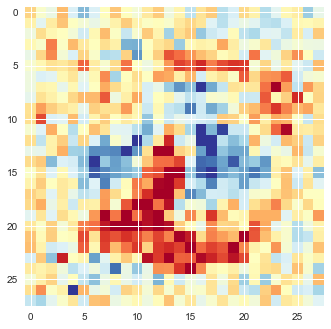

In [190]:
plt.imshow(np.reshape(lr.coef_, (28,28)), cmap=plt.cm.RdYlBu, vmin=-0.5, vmax=0.5)